## import nltk     # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
from nltk.stem import WordNetLemmatizer
import random                              # pseudo-random number generator
import pandas as pd
import numpy as np

In [14]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

# Twitter Dataset.

In [15]:
# downloads sample twitter dataset.
df=nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to C:\Users\Nikhith's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [16]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [17]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>
Number of tweets:  10000


In [6]:
labels = list(np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets)))))
len(labels)

10000

In [7]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[0])

# print negative in red
print('\033[91m' + all_negative_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
hopeless for tmr :(


In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nikhith's
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Cleaning

In [9]:
tweet2=[]
tweet3=[]
tweet4=[]
tweet5=[]
tweet6=[]
for i in tweets:
    tweet2.append(re.sub(r'^RT[\s]+', '', i)) # remove old style retweet text "RT"
for i in tweet2:
    tweet3.append(re.sub(r'https?://[^\s\n\r]+', '', i)) # remove hyperlinks 
for i in tweet3:
    tweet4.append(re.sub(r'#', '', i))# remove hashtags
for i in tweet4:
    tweet5.append(re.sub(r'@[A-Za-z0-9]+', '', i))# remove hashtags
for i in tweet5:
    tweet6.append(re.sub(r'[^\w\s]' ,"", i ))
    
print(len(tweet2))  
print(len(tweet3))
print(len(tweet4))
print(tweet6[random.randint(0,10)])
tweet6

10000
10000
10000
We dont like to keep our lovely customers waiting for long We hope you enjoy Happy Friday  LWWF  


['FollowFriday _Inte  _Paris for being top engaged members in my community this week ',
 ' Hey James How odd  Please call our Contact Centre on 02392441234 and we will be able to assist you  Many thanks',
 ' we had a listen last night  As You Bleed is an amazing track When are you in Scotland',
 ' CONGRATS ',
 'yeaaaah yippppy  my accnt verified rqst has succeed got a blue tick mark on my fb profile  in 15 days',
 '  This one is irresistible \nFlipkartFashionFriday ',
 'We dont like to keep our lovely customers waiting for long We hope you enjoy Happy Friday  LWWF  ',
 ' On second thought theres just not enough time for a DD  But new shorts entering system Sheep must be buying',
 'Jgh  but we have to go to Bayan D bye',
 'As an act of mischievousness am calling the ETL layer of our inhouse warehousing app Katamari\n\nWell as the name implies p',
 'FollowFriday  _gouv for being top influencers in my community this week ',
 'Who Wouldnt Love These BigJuicySelfies    ',
 '  follow  amp  f

## Tokenisation

In [10]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)

# tokenize tweets
#tweet_tokens = tokenizer.tokenize(tweet2)
tweet_tokens =[]
for i in tweet6:
    tweet_tokens.append(tokenizer.tokenize(i))

print()
print('Tokenized string:')
#print(len(tweet_tokens))
print(tweet_tokens)


Tokenized string:
[['followfriday', '_inte', '_paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week'], ['hey', 'james', 'how', 'odd', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', 'many', 'thanks'], ['we', 'had', 'a', 'listen', 'last', 'night', 'as', 'you', 'bleed', 'is', 'an', 'amazing', 'track', 'when', 'are', 'you', 'in', 'scotland'], ['congrats'], ['yeaaah', 'yipppy', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', 'in', '15', 'days'], ['this', 'one', 'is', 'irresistible', 'flipkartfashionfriday'], ['we', 'dont', 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', 'we', 'hope', 'you', 'enjoy', 'happy', 'friday', 'lwwf'], ['on', 'second', 'thought', 'theres', 'just', 'not', 'enough', 'time', 'for', 'a', 'dd', 'but', 'new', 'shorts', 'entering', 'system', 'sheep', 'must', 

## Removing StopWords 

In [11]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 
#print(type(stopwords_english))
print('Stop words\n')
print(stopwords_english)
string_punctuation = string.punctuation
print('\nPunctuation\n')
print(string_punctuation)


Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [12]:
# Python code to convert string to list
def Convert(string):
    li = list(string.split(" "))
    return li
punctuation_list = []
# Driver code
for i in string_punctuation:
    punctuation_list.append(Convert(i))
print(punctuation_list[random.randint(0,4)])


['$']


## Removing Punctuations 

In [14]:
#print()
#print('\033[92m')
#print(tweet_tokens)
#print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  word not in punctuation_list):  # remove punctuation and # remove stopwords
        tweets_clean.append(word)

print('removed stop words and punctuation:')
#print(len(tweets_clean))
print(tweets_clean[random.randint(0,100)])
for i in tweets_clean:
    print(i)
    



removed stop words and punctuation:
['our', 'new', 'product', 'line', 'is', 'in', 'our', 'etsy', 'shop', 'now', 'check', 'it', 'out', 'boxroomcrafts']
['followfriday', '_inte', '_paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week']
['hey', 'james', 'how', 'odd', 'please', 'call', 'our', 'contact', 'centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', 'many', 'thanks']
['we', 'had', 'a', 'listen', 'last', 'night', 'as', 'you', 'bleed', 'is', 'an', 'amazing', 'track', 'when', 'are', 'you', 'in', 'scotland']
['congrats']
['yeaaah', 'yipppy', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', 'in', '15', 'days']
['this', 'one', 'is', 'irresistible', 'flipkartfashionfriday']
['we', 'dont', 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', 'we', 'hope', 'you', 'enjoy', 'happy', 'friday', 'lwwf']
['on', 'second', 'thought', 

['follow', 'amp', 'follow', 'u', 'back']
['aur', 'han', 'imran', 'khan', '63', 'but', 'still', 'younger', 'than', 'many']
['awww', 'thanks', 'guys', 'wishing', 'you', 'both', 'a', 'wicked', 'weekend', 'travel', 'safe', 'x']
['thank', 'you']
['welcome', 'to', 'twitter', 'world', 'agaaain', 'sir']
['doli', 'siregar', 'retweeted', 'your', 'tweet', 'gt', 'many', 'thanks', 'cheers', 'ninh', 'inspire']
['welcometweet', 'thanks', 'for', 'following', 'me', 'via']
['its', 'a', 'shoe', 'box', 'size', 'of', 'a', 'shop', 'but', 'the', 'gems', 'in', 'there', 'makes', 'the', 'geekiest', 'of', 'geeks', 'cry', 'at', 'their', 'wallets']
['and', 'by', 'turning', 'up', 'to', 'be', 'fair', 'it', 'meant', 'a', 'lot', 'that', 'people', 'came']
['early', 'birds', 'are', 'gone', 'already', 'das', 'nice']
['i', 'request', 'those', 'media', 'persons', 'covering', 'rally', 'please', 'rotate', 'their', 'camera', 'just', 'once']
['omg', 'that', 'sucks', 'but', 'at', 'least', 'you', 'see', 'one', 'direction']
['am'

['purrthos', 'cathos', 'and', 'catamis', 'd']
['give', 'it', 'all', 'd']
['_', 'hi', 'i', 'see', 'u', 'like', 'fourfiveseconds', 'and', 'think', 'u', 'might', 'like', 'deaf', 'ears', 'plz', 'let', 'me', 'know', 'what', 'u', 'think']
['im', 'more', 'for', 'the', 'drugs', 'and', 'alcohol', 'apexis', 'crystal', 'meth', 'and', 'apexis', 'crystal', 'champagne', 'while', 'watching', 'apexis', 'crystal', 'palace', 'fc']
['made', 'some', 'stuff', 'tonight', 'for', 'a', 'streamer', 'it', 'felt', 'really', 'nice', 'getting', 'the', 'creative', 'juices', 'flowing', 'again', 'havent', 'done', 'that', 'in', 'a', 'while']
['thank', 'you', 'd']
['great', 'response', 'the', 'correct', 'hashtag', 'is', 'cretaperfectsuv', 'cretaperfect', '4me']
['new', 'portrait', 'by', 'izumi', 'fugiwara', 'at', 'clonmel', 'so', 'refreshing', 'and', 'vibrant']
['do', 'you', 'guys', 'have', 'an', 'estimated', 'time', 'when', 'the', 'server', 'would', 'be', 'up']
['nope', 'nope', 'its', 'better', 'to', 'keep', 'quiet']
[

['first', 'time', 'buyers', 'your', 'invited', '_belfast', '_b']
['new', 'still']
['ill', 'be', 'living', 'with', 'a', 'vegetarian', 'too', 'so', 'im', 'sure', 'shell', 'help', 'me']
['_steven', 'good', 'morning', 'steve', 'have', 'a', 'gooday', 'ff']
['_xxx', 'hi', 'jack', 'best', 'thing', 'to', 'do', 'would', 'be', 'to', 'call', '101']
['amazing', 'when', 'i', 'answer', 'the', 'door', 'to', 'the', 'mail', 'man', 'and', 'he', 'tells', 'me', 'i', 'look', 'rough', 'yep', 'thanks']
['jazmin', 'bonilla', 'i', 'just', 'want', 'to', 'info', 'you', 'there', 'is', 'a', 'secret', 'to', 'get', '12000', 'stars', 'kim', 'hollywood', 'check', 'them', 'on', 'my', 'bio']
['a', 'mail', 'follback']
['thanks', 'for', 'sharing', 'dear', 'oshieer', 'realreviews', 'happycustomers', 'realoshi', 'dealsuthaonotebachao']
['found', 'this', 'little', 'guy', 'at', 'my', 'store', 'no', 'bigger', 'then', 'a', 'dime']
['thanks', 'a', 'lot', 'carol', 'the', 'same', 'to', 'you', 'ff']
['thankyou', 'very', 'much', 'we

['woohoo', 'welcome', 'aboard', 'lani', 'great', 'to', 'have', 'you', 'grazing', 'with', 'us']
['ah', 'it', 'looks', 'fab', 'pride', 'of', 'place', 'bristolart']
['well', 'apparently', 'im', 'not', 'sleeping', 'seeing', 'as', 'its', 'already', 'starting', 'to', 'get', 'light', 'out', 'ha', 'ha', 'ha']
['_you', 'thank', 'you', 'for', 'the', 'follow']
['hi', 'dave', 'please', 'contact', 'our', 'inapp', 'support', 'chat', 'so', 'that', 'we', 'can', 'ensure', 'you', 'get', 'it', 'on', 'time']
['was', 'your', 'first', 'item', 'to', 'edit', 'your', 'list']
['well', 'screw', 'those', 'guys', 'u', 'keep', 'smiling']
['youre', 'welcome', 'amber', 'hope', 'youre', 'enjoying', 'them']
['_popculturefan', 'thank', 'you', 'i', 'do', 'several', 'steps', 'on', 'them', 'so', 'i', 'appreciate', 'you', 'noticing']
['they', 'didnt', 'deserve', 'that', 'shit']
['morning', 'thank', 'you', 'for', 'rts']
['_community', 'our', 'exciting', 'news', 'is', 'that', 'its', 'only', '43', 'days', 'till', 'hpc', 'party

['hi', 'bam', 'can', 'you', 'follow', 'my', 'bestfriend', 'she', 'loves', 'you', 'a', 'lot', 'see', 'you', 'in', 'warsaw', 'lt3', 'love', 'you', 'lt3', 'x4']
['follback']
['sorry', 'nic', 'dont', 'ya', 'worry', 'i', 'surrender']
['stats', 'for', 'the', 'week', 'have', 'arrived', '1', 'new', 'follower', 'and', 'no', 'unfollowers', 'via']
['look', 'what', 'i', 'caught', 'retweet', 'marine', 'fish', 'underwater', 'sea', 'ocean']
['that', 'will', 'be', '1590', 'for', 'you']
['your', 'garden', 'is', 'stunning', 'even', 'in', 'the', 'rain', 'yvette']
['love', 'your', 'author', 'pic', 'on', 'the', 'mwf', 'programme', 'youre', 'going', 'to', 'rock', 'it']
['taal', 'lake', 'i', 'love', 'philippines', 'retweet']
['see', 'you', 'on', 'monday', '2emt']
['i', '_', 'who', 'wants', 'a', 'ff', 'so']
['no', 'im', 'not']
['scurri', 'the', 'most', 'agile', 'shipping', 'solution', 'available', 'on', 'the', 'market', 'book', 'a', 'free', 'demo', 'at', 'retail', 'delivery', 'sme']
['dead', 'd']
['youre', 'w

['you', 'lose', 'd']
['hehe', 'cool']
['morning', 'how', 'are', 'u', 'today', 'what', 'have', 'u', 'got', 'planned', 'how', 'lazy', 'am', 'i', 'im', 'still', 'in', 'bed', 'toast', 'amp', 'fresh', 'coffee', '2', 'have', 'a', 'great', 'fridayfunday']
['welcome', 'to', 'the', 'family']
['resigned']
['can', 'i', 'just', 'meet', 'harry', 'thats', 'all', 'i', 'need', 'in', 'life']
['stats', 'for', 'the', 'week', 'have', 'arrived', '1', 'new', 'follower', 'and', 'no', 'unfollowers', 'via']
['one', 'more', 'sleep', 'til', 'the', 'wedding']
['excited', 'about', 'the', 'chalkhill', 'park', 'celebration', 'tomorrow', 'from', 'midday', 'come', 'join', 'the', 'fun']
['hello', 'love', 'you', 'carter']
['what', 'a', 'good', 'read']
['you', 'too']
['enjoy', 'hope', 'weather', 'holds', 'for', 'you', 'guys']
['_fika', 'done']
['_263', 'the', 'remedies', 'the', 'media', 'wont', 'tell', 'you', 'about']
['thank', 'you']
['jumma', 'mubarak', 'all', 'of', 'you', 'stay', 'blessed']
['were', 'looking', 'forwar

['such', 'a', 'stressful', 'and', 'upsetting', 'day', 'yesterday', 'the', 'uk', 'government', 'sucks']
['ugh', 'well', 'i', 'could', 'still', 'say', 'that', 'im', 'lucky', 'because', 'i', 'am', 'sapiosexual']
['aww', 'too', 'bad']
['ive', 'been', 'trying', 'to', 'play', 'the', 'damn', 'beta', 'for', 'like', '12', 'hours', 'now']
['i', 'dont', 'want', 'to', 'be', 'in', 'a', 'world', 'where', 'hulk', 'hogan', 'has', 'been', 'scrubbed', 'from', 'wwe', 'history']
['im', 'so', 'tired']
['this', 'weather', 'isnt', 'making', 'me', 'want', 'to', 'go', 'to', 'the', 'gym', 'at', 'all']
['link', 'doesnt', 'work']
['irene', 'seemed', 'so', 'sad', 'after', 'making', 'that', 'mistake']
['naa', 'unfortunately', 'i', 'didnt', 'have', 'my', 'phone', 'on', 'me']
['its', 'sold', 'out']
['i', 'hate', 'u', 'gtlt', 'gt', 'h_my_king']
['we', 'lose', 'again']
['valentine', 'et', 'al', 'found', 'rships', 'btwn', 'homobiphobic', 'comments', 'amp', 'certain', 'disciplines', 'incl', 'european', 'langs', 'lit', 'e

['these', 'are', 'three', 'of', 'my', 'favourite', 'pictures', 'i', 'took', 'of', 'brad', 'i', 'miss', 'tour', 'so', 'much']
['looking', 'for', 'genad', 'better', 'if', 'the', 'price', 'can', 'be', 'negotiable', 'can', 'someone', 'help', 'me', 'huhuhuhuhu', 'bbmadeinmanila', 'findavip']
['photo', 'boyirl']
['yasss', 'still', 'dont', 'get', 'paid', 'til', 'august', '6th', 'lol', 'still', 'got', 'hella', 'clothes', 'though']
['so', 'much']
['ive', 'only', 'been', 'a', 'fan', 'of', '5sos', 'since', 'early', 'june', 'last', 'year', 'and', 'i', 'really', 'hate', 'that', 'i', 'get', 'so', 'upset', 'over', 'it', 'not', 'that', 'my', 'parents']
['miss', 'you', 'too', 'laine']
['ahh', 'no', 'what', 'did', 'you', 'get', 'done', 'i', 'hope', 'youre', 'okay']
['im', 'so', 'tired']
['i', 'have', 'a', 'bad', 'sleep', 'difficiency']
['i', 'have', 'been', 'a', 'customer', 'for', '20', 'years', 'my', 'internet', 'is', 'no', 'why', 'near', 'the', 'speed', 'it', 'should', 'be', 'its', 'so', 'so', 'slow']

['hope', 'that', 'person', 'is', 'in', 'jail']
['weirddd']
['everyone', 'is', 'happy', 'bc', 'they', 'have', 'amazing', 'friends', 'bc', 'of', '1d', 'then', 'here', 'i', 'am', 'still', 'waiting', 'for', 'my', 'internet', 'bestfriends']
['head', 'ache']
['ruined', 'gt']
['i', 'need', 'more', 'donghyuk', 'stans', 'in', 'my', 'tl', 'where', 'u', 'guys', 'at']
['but', 'why']
['i', 'miss', 'beks', 'original', 'body', 'since', 'episode', '13']
['reynoldsgrl', 'either', 'deactivated', 'or', 'got', 'suspended', 'i', 'wanted', 'to', 'shade']
['just', 'got', 'home', 'heavy', 'rain']
['sorry']
['haha', 'i', 'feel', 'so', 'naked', 'without', 'ole', 'beardy', 'tho']
['how', 'did', 'you', 'get', 'it', 'ive', 'been', 'trying', 'for', 'ages', 'and', 'no', 'joy']
['i', 'want', 'to', 'sleep', 'why', 'am', 'i', 'not', 'tired']
['this', 'song', 'is', 'freaking', 'saaad']
['sorry', 'guys', 'no', 'new', 'video', 'this', 'week']
['_omnibus', 'aw', 'thats', 'a', 'shame', 'we', 'thought', 'you', 'were', 'well'

['fineandyu', 'takes', 'such', 'gd', 'pics', 'its', 'like', 'shes', 'trying', 'to', 'hurt', 'me']
['nonot', 'in', 'your', 'face', 'enough', 'for', 'thatjust', 'couldnt', 'face', 'him', 'in', 'the', 'flesh', 'know', 'its', 'daftbut', 'couldnt', 'cope', 'with', 'it']
['shes', 'so', 'cute']
['i', 'want', 'one', 'too', 'bit', 'noone', 'knows', 'me', 'on', 'twitter', 'so']
['i', 'had', 'three', 'dreams', 'last', 'night', 'and', 'the', 'one', 'i', 'dont', 'want', 'to', 'remember', 'i', 'do', 'and', 'the', 'two', 'i', 'want', 'to', 'remember', 'i', 'dont']
['wednesday', 'needs', 'to', 'hurry']
['snapchat', 'tammirossm', 'snapchat', 'kikgirl', 'kikchat', 'wet', 'wife', 'indiemusic', 'sexy']
['my', 'last', 'though']
['thats', 'me', 'omg', 'imsorry']
['aku', 'chelsea', 'koe', 'emyu', 'can', 'you', 'see', 'that', 'i', 'miss', 'you']
['i', 'popped', 'confetti', 'though']
['sams', 'sister', 'and', 'her', 'bf']
['please', 'release', 'a', 'new', 'album']
['good', 'dong', 'by', 'sini', 'dipoppo']
['_1

['guys', 'nooo', 'what', 'a', 'wow', 'wow', 'wow', 'wow']
['this', 'boy', 'was', 'snapchattimg', 'me', 'and', 'i', 'was', 'happy', 'bc', 'friends', 'then', 'he', 'ruined', 'it', 'when', 'he', 'said', 'you', 'wanna', 'have', 'fun']
['i', 'couldnt', 'i', 'look', '12', 'still']
['tbh', 'i', 'forget', 'who', 'is', 'the', 'donation', 'manager', 'in', 'sin', 'amp', 'due', 'to', 'my', 'hp', 'corrupted', 'did', 'a', 'restore', 'all', 'my', 'data', 'lost', 'lor']
['its', 'the', 'worst', 'pain']
['but', 'never', 'dedicating', 'anything', 'to', 'me', 'smh', 'lol']
['irene', 'unnie', 'bite', 'her', 'fingers', 'and', 'worriedly', 'stared', 'at', 'staff', 'its', 'okay', 'unnie']
['i', 'feel', 'so', 'sick']
['what']
['guys', 'add', 'my', 'kik', 'toneady', '46532', 'kik', 'kikmeboys', 'wife', 'porno', 'snapdirty', 'premiostumundo', 'sheskindahot']
['omfg', 'the', 'hugging', 'corpses']
['taeny', 'fyeah', 'the', 'link', 'is', 'broken']
['hello', 'any', 'info', 'about', 'possible', 'interest', 'of', 'jon

## Stemming 

In [15]:
# print(tweets_clean)
stemmer = PorterStemmer() 

In [16]:
def getCleanedText(text):
    text=' '.join(str(e) for e in text)
    text=text.lower()
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in stopwords_english]
    stemmed_tokens=[stemmer.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

In [17]:
stemmed_clean_text=[getCleanedText(i) for i in tweets_clean]

In [18]:
stemmed_clean_text

['followfriday _int _pari top engag member commun week',
 'hey jame odd pleas call contact centr 02392441234 abl assist mani thank',
 'listen last night bleed amaz track scotland',
 'congrat',
 'yeaaah yipppi accnt verifi rqst succeed got blue tick mark fb profil 15 day',
 'one irresist flipkartfashionfriday',
 'dont like keep love custom wait long hope enjoy happi friday lwwf',
 'second thought there enough time dd new short enter system sheep must buy',
 'jgh go bayan bye',
 'act mischiev call etl layer inhous wareh app katamari well name impli p',
 'followfriday _gouv top influenc commun week',
 'wouldnt love bigjuicyselfi',
 'follow amp follow u back',
 'perfect alreadi know what wait',
 'great new opportun junior triathlet age 12 13 gatorad seri get entri',
 'lay greet card rang print today love job',
 'friend lunch yummm nostalgia tb ku',
 'id conflict thank help here screenshot work',
 '_ hi liv',
 'hello need know someth u fm twitter sure thing dm x',
 'followfriday _ _fle top 

## Lemmatization 

In [19]:
lemmatizer = WordNetLemmatizer()
tweet_lem=[]
for i in stemmed_clean_text:
    tweet_lem.append(tokenizer.tokenize(i))


In [20]:
tweet_lem_clean=[]
for word in tweet_lem: # Go through every word in your tokens list
    if (word not in stopwords_english and  word not in punctuation_list):  # remove punctuation and # remove stopwords
        tweet_lem_clean.append(word)

### WordCloud 

In [21]:
clean_text=[]
for i in tweet_lem_clean:
    clean_text.append("".join(i))
# print(clean_text)
# print(tweet_lem_clean[:5])

In [22]:
# tweet_lem_clean

In [23]:
!pip install utils

In [24]:
text2 = " ".join(i for i in clean_text)

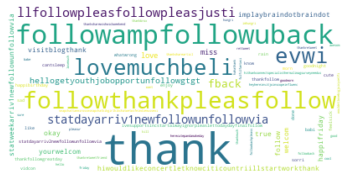

In [25]:
from wordcloud import WordCloud
wordCloud=WordCloud(collocations = False, background_color = 'white',stopwords=stopwords_english).generate(text2)
plt.imshow(wordCloud , interpolation='bilinear')
plt.axis('off')
plt.show()

## Train,Test Split 

In [48]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(stemmed_clean_text, test_size=0.2,shuffle=False)
y_training_data, y_testing_data = train_test_split(labels, test_size=0.2,shuffle=False)


In [49]:
# print(training_data[0].shape[0])

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
train_vec = cv.fit_transform(training_data).toarray()

In [51]:
testing_vect =cv.transform(testing_data).toarray()
testing_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
# len(training_data)
# len(labels)


## Multinomial NaiveBayes 

In [53]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()

In [54]:
training_data

['followfriday _int _pari top engag member commun week',
 'hey jame odd pleas call contact centr 02392441234 abl assist mani thank',
 'listen last night bleed amaz track scotland',
 'congrat',
 'yeaaah yipppi accnt verifi rqst succeed got blue tick mark fb profil 15 day',
 'one irresist flipkartfashionfriday',
 'dont like keep love custom wait long hope enjoy happi friday lwwf',
 'second thought there enough time dd new short enter system sheep must buy',
 'jgh go bayan bye',
 'act mischiev call etl layer inhous wareh app katamari well name impli p',
 'followfriday _gouv top influenc commun week',
 'wouldnt love bigjuicyselfi',
 'follow amp follow u back',
 'perfect alreadi know what wait',
 'great new opportun junior triathlet age 12 13 gatorad seri get entri',
 'lay greet card rang print today love job',
 'friend lunch yummm nostalgia tb ku',
 'id conflict thank help here screenshot work',
 '_ hi liv',
 'hello need know someth u fm twitter sure thing dm x',
 'followfriday _ _fle top 

In [55]:
mn.fit(train_vec,y_training_data)    

MultinomialNB()

In [56]:
type(training_data)

list

In [57]:
type(y_training_data)

list

In [58]:
print(training_data[1000])

commun knowledg


In [59]:
print(y_training_data[1000])

1.0


In [60]:
def getCleanedText_text(text):
    text=text.lower()
    tokens=tokenizer.tokenize(text)
    new_tokens=[token for token in tokens if token not in stopwords_english]
    stemmed_tokens=[stemmer.stem(tokens) for tokens in new_tokens]
    clean_text=" ".join(stemmed_tokens)
    return clean_text

### Sample Example 

In [61]:
x_test=["I was happy & I loved the acting in the movie","The movie I saw was bad"]
x_clean=[getCleanedText_text(i) for i in x_test]
x_clean

['happi & love act movi', 'movi saw bad']

In [62]:
x_clean_vec=cv.transform(x_clean).toarray()
x_clean_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
y_pred = mn.predict(x_clean_vec)

In [64]:
y_pred

array([1., 0.])